In [589]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.cluster import Birch
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture

In [484]:
filename = "USvideos.csv"
df = pd.read_csv(filename)
df['like_rate'] =  df ['likes'] / df['views']  * 100
df['dislike_rate'] =  df ['dislikes'] / df['views']  * 100
df['like_ratio'] =  df ['dislikes'] / df['likes'] 
df['comment_ratio'] = df['comment_count']/df['views']

In [485]:
n_data = df.shape[0]
feature_list = df.columns
print("the number of video data is:", n_data)
print("features are:", feature_list)
print("the number of features are:", len(feature_list))

the number of video data is: 40949
features are: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'like_rate', 'dislike_rate',
       'like_ratio', 'comment_ratio'],
      dtype='object')
the number of features are: 20


In [486]:
print(df.dtypes)

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
like_rate                 float64
dislike_rate              float64
like_ratio                float64
comment_ratio             float64
dtype: object


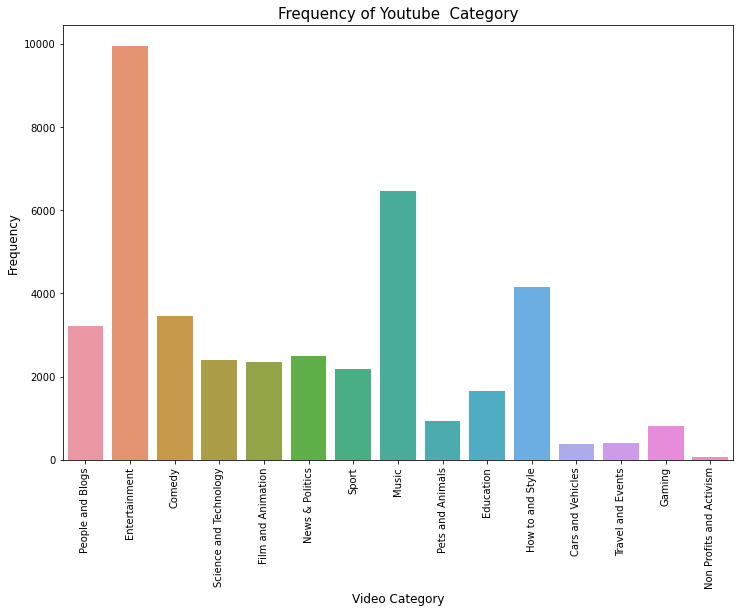

In [487]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

plt.figure(figsize=(12,8))
sns.countplot(x="category_name", data=df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Youtube  Category", fontsize=15)
plt.show()

In [488]:
df[(df['category_name'] == "Entertainment")]['dislike_rate'].value_counts().sort_index()

0.000000     91
0.000440      1
0.000502      1
0.000521      1
0.000522      1
             ..
9.727312      1
9.843657      1
9.927943      1
10.325331     1
11.982720     1
Name: dislike_rate, Length: 9851, dtype: int64

In [489]:
df[(df['category_name'] == "Entertainment")]['like_rate'].value_counts().sort_index()

0.000000     30
0.007502      1
0.007822      1
0.008097      1
0.008232      1
             ..
17.914886     1
18.233381     1
18.787184     1
19.226209     1
20.526227     1
Name: like_rate, Length: 9912, dtype: int64

In [490]:
#we build a training set with 3 categories

entertainment_df = df[(df['category_name'] == "Entertainment") & (df['like_rate'] > 3) 
                      &  (df['like_rate'] < 20) & (df['dislike_rate']>0.1) &  (df['dislike_rate'] < 0.2)].copy()
music_df = df[(df['category_name'] == "Music") & (df['like_rate'] > 9) 
                      &  (df['like_rate'] < 20) & (df['dislike_rate']>0.01) &  (df['dislike_rate'] < 0.15)].copy()
news_df = df[(df['category_name'] == "News & Politics")& (df['like_rate'] > 0.1) 
                      &  (df['like_rate'] < 20) & (df['dislike_rate']>0.01) &  (df['dislike_rate'] < 0.2)].copy()

#sport_df = df[(df['category_name'] == "Sport")][:800]
#pets_df = df[(df['category_name'] == "Pets and Animals")][:800]
#cluster_df = pd.concat([gaming_df, music_df, news_df, sport_df, pets_df])
cluster_df = pd.concat([entertainment_df, music_df, news_df])
cluster_df.head(5)
print("the shape of cluster_df is:", cluster_df.shape)



the shape of cluster_df is: (2958, 21)


In [491]:
#preprocess text data
cluster_df["title"] = cluster_df["title"].str.lower()

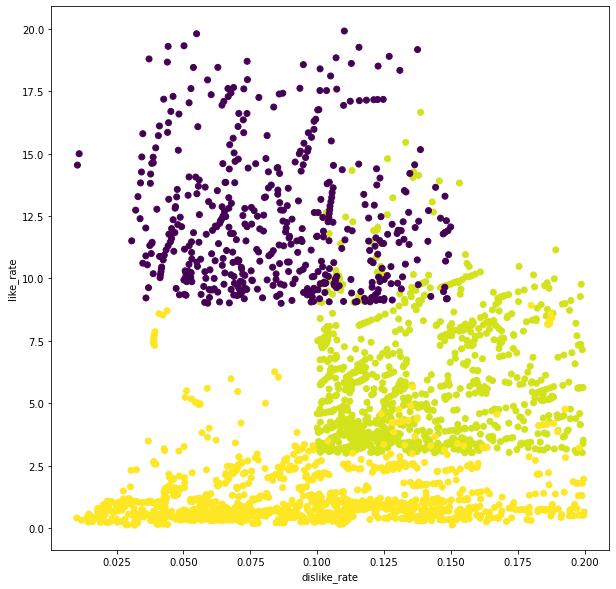

In [492]:
df1 = cluster_df.copy()
x = df1['dislike_rate'].values
y = df1['like_rate'].values
z = df1['category_id'].values
#colormap = np.array(['r', 'g', 'b'])
fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y,
           c= z)
plt.xlabel('dislike_rate')
plt.ylabel('like_rate')
plt.show()

In [557]:
# Data fitting for kmeans

start_time = time.time()
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=10,random_state=0) 
X1 = df1['dislike_rate'].values
X2 = df1['like_rate'].values 
X = [[X1[i],X2[i]] for i in range(len(X1))]
y_kmeans = kmeans.fit(X)
y_kmeans1 = kmeans.fit_predict(X)
end_time = time.time()

print ("Run time duration of kmean is:",end_time - start_time)
df1['cluster'] = y_kmeans1

Run time duration of kmean is: 0.14494609832763672


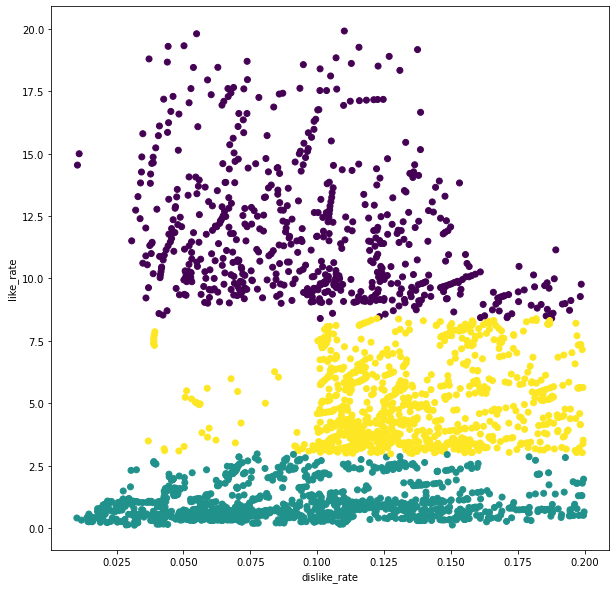

In [558]:
#Kmeans Visualization
x = df1['dislike_rate'].values
y = df1['like_rate'].values
z = df1['cluster'].values
#colormap = np.array(['r', 'g', 'b'])
fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y,
           c= z)
plt.xlabel('dislike_rate')
plt.ylabel('like_rate')
plt.show()

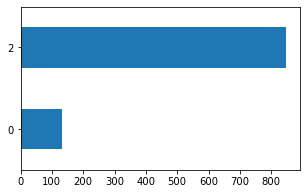

In [559]:
df1[(df1['category_name'] == "Entertainment")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

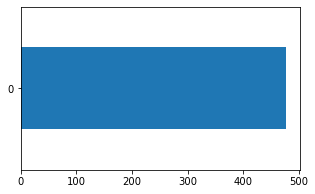

In [560]:
df1[(df1['category_name'] == "Music")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

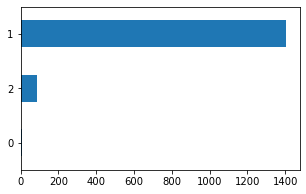

In [561]:
df1[(df1['category_name'] == "News & Politics")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

In [555]:
T_e = df1[(df1['category_name'] == "Entertainment") & (df1['cluster'] == 2)].shape[0]
F_e = df1[(df1['category_name'] == "Entertainment") & (df1['cluster'] == 0)].shape[0]
print("T_entertainment:", T_e)
print("F_entertainment:", F_e)
T_m = df1[(df1['category_name'] == "Music") & (df1['cluster'] == 0)].shape[0]
print("T_music:", T_m)
F_m = 0
T_n = df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 1)].shape[0]
print("T_news:", T_n)
F_n_2 = df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 2)].shape[0]
F_n_0 = df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 0)].shape[0]
print("F_news:", F_n_2+F_n_0)

T_entertainment: 848
F_entertainment: 133
T_music: 477
T_news: 1406
F_news: 94


In [562]:
#precision = sumT/ sum F 
precision = (T_m+T_n+T_e)/(T_m+T_n+T_e+F_n_0+F_m+F_n_2+F_e)
print("precision is:", precision)

precision is: 0.9232589587559161


In [563]:
#DBSCAN
X1 = df1['dislike_rate'].values
X2 = df1['like_rate'].values 
X = [[X1[i],X2[i]] for i in range(len(X1))]

In [577]:
start_time = time.time()

#preprocess
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 


db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 

labels = db_default.labels_ 

end_time = time.time()

print ("Run time duration of dbscan is:",end_time - start_time)
df1['cluster'] = labels


Run time duration of dbscan is: 0.028615951538085938


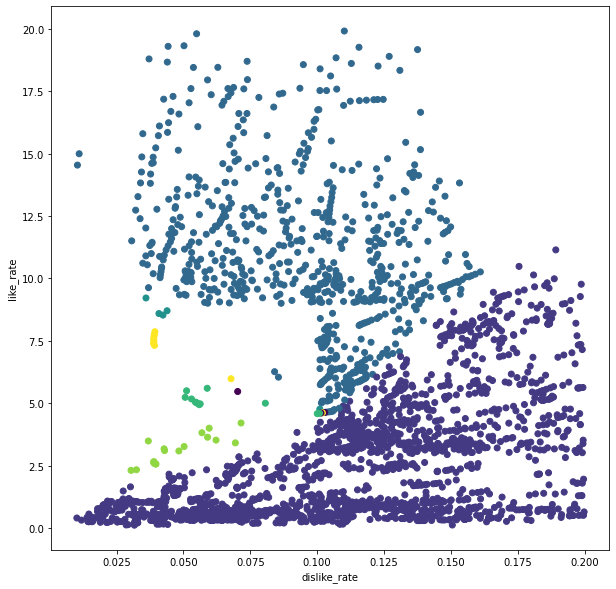

In [565]:
#DBSCAN Visualization
x = df1['dislike_rate'].values
y = df1['like_rate'].values
z = df1['cluster'].values
#colormap = np.array(['r', 'g', 'b'])
fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y,
           c= z)
plt.xlabel('dislike_rate')
plt.ylabel('like_rate')
plt.show()

In [574]:
print("number of cluster of DBScan is:", len(set(labels)))

number of cluster of DBScan is: 7


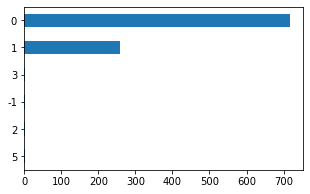

In [567]:
df1[(df1['category_name'] == "Entertainment")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

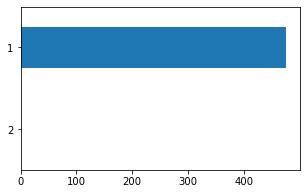

In [568]:
df1[(df1['category_name'] == "Music")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

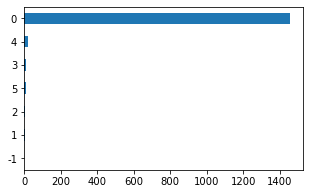

In [569]:
df1[(df1['category_name'] == "News & Politics")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

In [571]:
precision = (df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 0)].shape[0] +
             df1[(df1['category_name'] == "Music") & (df1['cluster'] == 1)].shape[0]+
             df1[(df1['category_name'] == "Entertainment") & (df1['cluster'] == 2)].shape[0])/df1.shape[0]
print("precision of DBSCAN is:", precision)

precision of DBSCAN is: 0.6531440162271805


In [576]:
#BIRCH
X1 = df1['dislike_rate'].values
X2 = df1['like_rate'].values 
X = [[X1[i],X2[i]] for i in range(len(X1))]

In [581]:
start_time = time.time()
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

end_time = time.time()
print ("Run time duration of BIRCH is:",end_time - start_time)
df1['cluster'] = yhat

Run time duration of BIRCH is: 0.21621298789978027


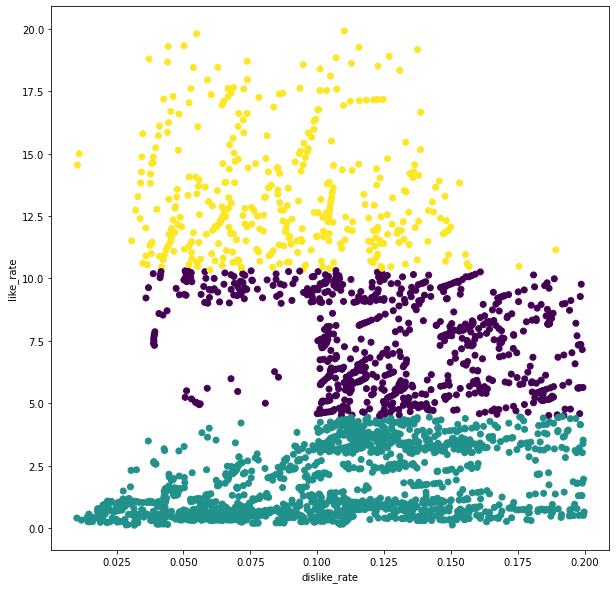

In [582]:
#BIRCH Visualization
x = df1['dislike_rate'].values
y = df1['like_rate'].values
z = df1['cluster'].values
#colormap = np.array(['r', 'g', 'b'])
fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y,
           c= z)
plt.xlabel('dislike_rate')
plt.ylabel('like_rate')
plt.show()

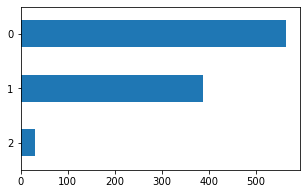

In [583]:
df1[(df1['category_name'] == "Entertainment")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

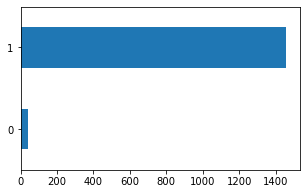

In [584]:
df1[(df1['category_name'] == "News & Politics")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

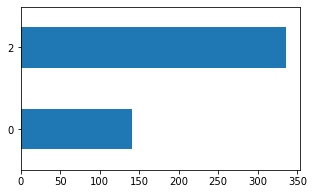

In [585]:
df1[(df1['category_name'] == "Music")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

In [587]:
precision = (df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 1)].shape[0] +
             df1[(df1['category_name'] == "Music") & (df1['cluster'] == 2)].shape[0]+
             df1[(df1['category_name'] == "Entertainment") & (df1['cluster'] == 0)].shape[0])/df1.shape[0]
print("precision of BIRCH is:", precision)

precision of BIRCH is: 0.7971602434077079


In [588]:
#Gaussian mixture
X1 = df1['dislike_rate'].values
X2 = df1['like_rate'].values 
X = [[X1[i],X2[i]] for i in range(len(X1))]

In [592]:
start_time = time.time()
# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

end_time = time.time()
print ("Run time duration of gaussian mixture is:",end_time - start_time)
df1['cluster'] = yhat

Run time duration of gaussian mixture is: 0.06619906425476074


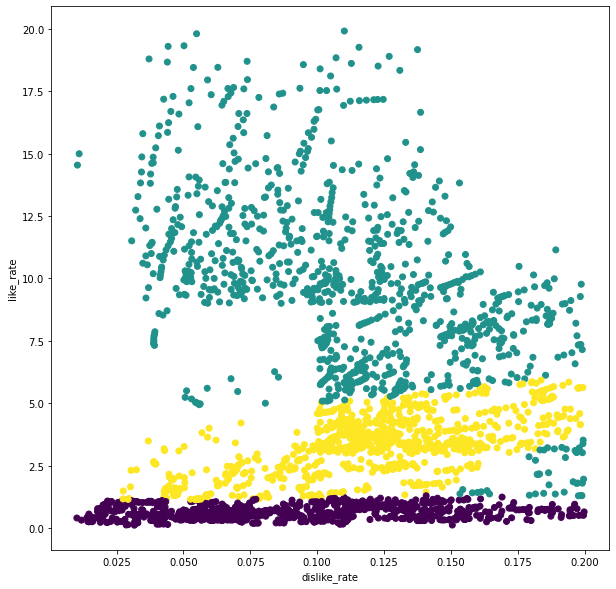

In [593]:
#Gaussian mixture Visualization
x = df1['dislike_rate'].values
y = df1['like_rate'].values
z = df1['cluster'].values
#colormap = np.array(['r', 'g', 'b'])
fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y,
           c= z)
plt.xlabel('dislike_rate')
plt.ylabel('like_rate')
plt.show()

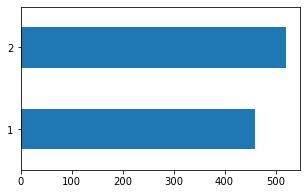

In [594]:
df1[(df1['category_name'] == "Entertainment")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

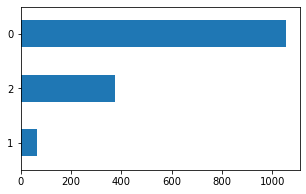

In [595]:
df1[(df1['category_name'] == "News & Politics")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

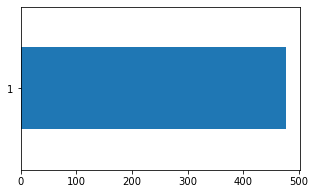

In [596]:
df1[(df1['category_name'] == "Music")]['cluster'].value_counts().sort_values().plot(kind = 'barh', figsize=(5,3))

In [599]:
precision = (df1[(df1['category_name'] == "News & Politics") & (df1['cluster'] == 0)].shape[0] +
             df1[(df1['category_name'] == "Music") & (df1['cluster'] == 1)].shape[1]+
             df1[(df1['category_name'] == "Entertainment") & (df1['cluster'] == 2)].shape[0])/df1.shape[0]
print("precision of Gaussian mixture is:", precision)

precision of Gaussian mixture is: 0.5412440838404328
